# EDA

## Overview

The big question I have on the onset of this research is how granular do we need to get in our model?

* Are the dyanmics similar enough across stations such that they can all be included in the same model, or do we need to build models for clusters of stations? We will try some logical groupings to see if there are any global patterns of dynamics across them. 

* Weekday-Weekend? Day by day? Month by month? Seasonality? Let's do some side-by-side visualizations of these time periods to see if any trends emerge. 

* How granular should we be in time bins (1 hour bins, 10 minutes, 1 minute)? I think some simple histograms can help us identity the kinds of volume of activity we are seeing. 

I'm curious about the number of bikes in the fleet, month by month, year by year. I think his may map onto the growth of the company, and that there may be different dynamics at each scale of growth. This is a big question I have with this data going forward - how will this prediction model scale? I'd love to work closely with the company to observe such shifts. 

## May 2015 vs. May 2016

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pprint
%load_ext autoreload

may_15 = pd.read_csv('~/Code/babs/data/test_data/trips_may2015.csv')
may_16 = pd.read_csv('~/Code/babs/data/test_data/trips_may2016.csv')

In [2]:
may_15[0:5]

,Unnamed: 0,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,...,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
0,3,772874,733,2015-05-19 09:50:00,Davis at Jackson,42,2015-05-19 10:02:00,2nd at Townsend,61,501,...,Subscriber,2015-05-19,2015-05-19,2015,5,19,09:50:00,19,10:02:00,20150519
1,102,751066,481,2015-05-03 21:03:00,Broadway St at Battery St,82,2015-05-03 21:11:00,Steuart at Market,74,363,...,Subscriber,2015-05-03,2015-05-03,2015,5,3,21:03:00,3,21:11:00,20150503
2,131,758565,319,2015-05-08 08:12:00,Redwood City Medical Center,26,2015-05-08 08:18:00,Redwood City Caltrain Station,22,106,...,Subscriber,2015-05-08,2015-05-08,2015,5,8,08:12:00,8,08:18:00,20150508
3,135,779542,983,2015-05-24 10:32:00,Temporary Transbay Terminal (Howard at Beale),55,2015-05-24 10:49:00,Civic Center BART (7th at Market),72,538,...,Subscriber,2015-05-24,2015-05-24,2015,5,24,10:32:00,24,10:49:00,20150524
4,146,785808,290,2015-05-29 09:22:00,Embarcadero at Sansome,60,2015-05-29 09:27:00,Steuart at Market,74,267,...,Subscriber,2015-05-29,2015-05-29,2015,5,29,09:22:00,29,09:27:00,20150529


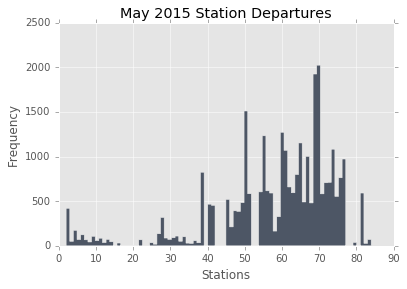

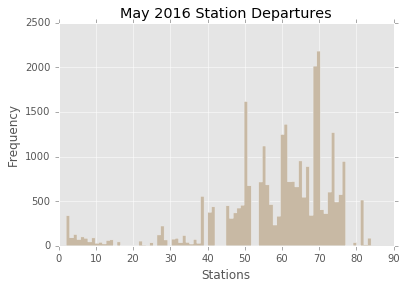

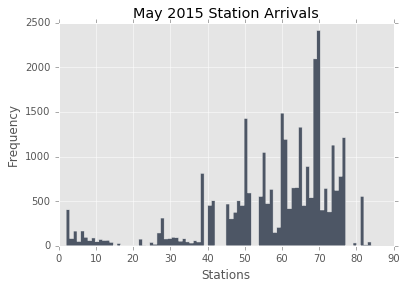

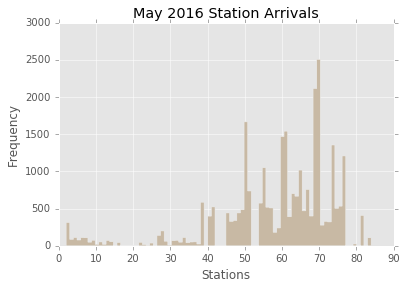

In [3]:
departures_may_15 = may_15['start_station_id']
departures_may_16 = may_16['start_station_id']
arrivals_may_15 = may_15['end_station_id']
arrivals_may_16 = may_16['end_station_id']

plt.figure(1)

plt.hist(departures_may_15, 84, histtype='stepfilled', color = '#4d5665')
plt.title('May 2015 Station Departures')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(2)

plt.hist(departures_may_16, 84, histtype='stepfilled', color = '#c8b9a4')
plt.title('May 2016 Station Departures')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(3)

plt.hist(arrivals_may_15, 84, histtype='stepfilled', color = '#4d5665')
plt.title('May 2015 Station Arrivals')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(4)

plt.hist(arrivals_may_16, 84, histtype='stepfilled', color = '#c8b9a4')
plt.title('May 2016 Station Arrivals')
plt.xlabel('Stations')
plt.ylabel('Frequency')

At first glance we can see the situation we are trying to identify with this project - the popular stations show more arrivals than departures! 

But, how much more? Let's start by identifybing all the stations with discrepencies for the month (more arrivals than departures). 

## Two Mondays in May

Let's slice off two Mondays in May and zoom in to see how comprable their activity is. 

In [4]:
may_4 = may_15.query('end_day == 4')
may_11 = may_15.query('end_day == 11')

In [5]:
print len(may_4)
print len(may_11)

1294
1291


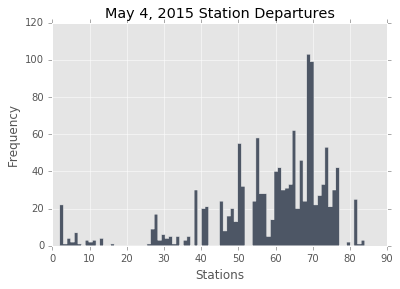

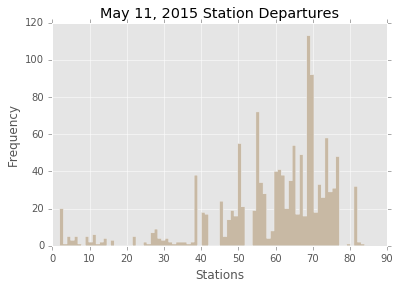

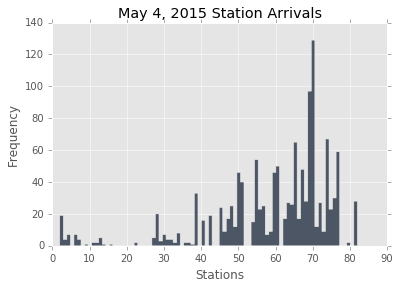

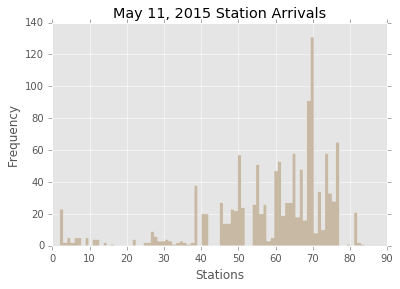

In [6]:
departures_may_4 = may_4['start_station_id']
departures_may_11 = may_11['start_station_id']
arrivals_may_4 = may_4['end_station_id']
arrivals_may_11 = may_11['end_station_id']

plt.figure(1)

plt.hist(departures_may_4, 84, histtype='stepfilled', color = '#4d5665')
plt.title('May 4, 2015 Station Departures')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(2)

plt.hist(departures_may_11, 84, histtype='stepfilled', color = '#c8b9a4')
plt.title('May 11, 2015 Station Departures')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(3)

plt.hist(arrivals_may_4, 84, histtype='stepfilled', color = '#4d5665')
plt.title('May 4, 2015 Station Arrivals')
plt.xlabel('Stations')
plt.ylabel('Frequency')

plt.figure(4)

plt.hist(arrivals_may_11, 84, histtype='stepfilled', color = '#c8b9a4')
plt.title('May 11, 2015 Station Arrivals')
plt.xlabel('Stations')
plt.ylabel('Frequency')

As we say in our May data, we see more arrivals than departures for a few of the leading stations around 68. It would be good to calculate some deltas for each station across the entire day for these two days. 

## Create matrics for 'Two Mondays in May'

In [7]:
may_4[0:5]

,Unnamed: 0,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,...,subscriber_type,start_just_date,end_just_date,year,month,start_day,start_time,end_day,end_time,end_yyyymmdd
25,945,752508,758,2015-05-04 17:54:00,Embarcadero at Folsom,51,2015-05-04 18:07:00,San Francisco Caltrain 2 (330 Townsend),69,509,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,17:54:00,4,18:07:00,20150504
32,1192,752043,441,2015-05-04 14:28:00,2nd at South Park,64,2015-05-04 14:35:00,Yerba Buena Center of the Arts (3rd @ Howard),68,687,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,14:28:00,4,14:35:00,20150504
41,1413,752524,612,2015-05-04 18:01:00,Market at 10th,67,2015-05-04 18:11:00,San Francisco Caltrain 2 (330 Townsend),69,309,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,18:01:00,4,18:11:00,20150504
68,2228,751517,650,2015-05-04 08:40:00,Powell at Post (Union Square),71,2015-05-04 08:51:00,San Francisco Caltrain (Townsend at 4th),70,598,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,08:40:00,4,08:51:00,20150504
78,2605,752621,348,2015-05-04 18:22:00,San Jose Diridon Caltrain Station,2,2015-05-04 18:28:00,San Pedro Square,6,205,...,Subscriber,2015-05-04,2015-05-04,2015,5,4,18:22:00,4,18:28:00,20150504


In [8]:
%autoreload
from network import Stations

In [9]:
d = np.zeros([84, 84])

In [10]:
may_4.columns

Index([u'Unnamed: 0', u'trip_id', u'duration_sec', u'start_date',
       u'start_station_name', u'start_station_id', u'end_date',
       u'end_station_name', u'end_station_id', u'bike_number', u'zip_code',
       u'subscriber_type', u'start_just_date', u'end_just_date', u'year',
       u'month', u'start_day', u'start_time', u'end_day', u'end_time',
       u'end_yyyymmdd'],
      dtype='object')

In [21]:
for i, row in may_4.iterrows():
    d[row['start_station_id']-1][row['end_station_id']-1] += 1
    

In [22]:
d

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  0.,  0.,  0.]])